In [1]:
## Import necessary libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import nltk.data
import re
import string
import random
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import sentiwordnet as swn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,HashingVectorizer
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss


[nltk_data] Downloading package wordnet to /Users/spaturi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
imdb_df = pd.read_csv("./Movie_reviews.csv")

In [3]:
imdb_df.shape # In order to know structure of the input file

(40000, 2)

In [4]:
imdb_df.columns # for to column names 

Index(['text', 'label'], dtype='object')

In [6]:
imdb_df['label'].dtype

dtype('int64')

In [5]:
imdb_df.head(5) # To get the first 5 rows

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [6]:
imdb_df.rename(columns = {'text':'movie_review','label':'opinion'}, inplace = True) # Rename the column names

In [7]:
imdb_df.opinion.value_counts()

0    20019
1    19981
Name: opinion, dtype: int64

# The dataset contains balance dataset so we need not to worry 

In [8]:
stop_words = stopwords.words('english') #Loading the english stopwords and storing in a variable
stop_words.remove('not')
# print(stop_words)

In [9]:
contraction_mapping = {"isn't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have", 'yticket' : 'ticket', "yreferred" : "referred", "activestatus" : "actives tatus",
                           
                           "activesegment" : "active segment", "individualfinancial" : "individual financial", "ysupport" : "support", "reviewnext" : "review next",
                           
                           "ction": "action", "tconsultation": "consultation", "activeaccount": "active account", "nsupport" : "support", "selfservetype" : "self serve type",
                      
                          "individualfinancial" : "individual financial", "i'am" : "i am"}

In [10]:
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower() # Converting the sentence into lower case
    sentence=sentence.replace('{html}',"") #Removing html tags
    cleanr = re.compile('<.*?>')        #For removing the special characters
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext) #Removing html links
    rem_num = re.sub(r'\b[0-9]+\b\s*', '', rem_url)# Removing numbers in a sentence
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in rem_num.split(" ")])
    text = newString.strip(' ')  #Removing the leading spaces 
    text = re.sub(r'[^a-zA-Z]',' ', text) #Keeping only the alphabets related words
    tokenizer = RegexpTokenizer(r'\w+') 
    tokens = tokenizer.tokenize(text)  #tokenizing the sentence into words
    filtered_words = [w for w in tokens if not w in stop_words] #Looping the sentces words and checking stopwords contians or not
    #word for word in words if word not in stop
    #stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words] #lemmatizing each word
    return " ".join(lemma_words)

In [11]:
#Function by which we only take the important words only i.e Noun, adjective, Adverb , Verb
def noun_words(text, verb = True, adverb = True, adjective = True):
    sen = sp(text)
    if verb == True:
        verb = 'VERB'
    else:
        verb == False
    if adverb == True:
        adverb = 'ADVERB'
    else:
        adverb == False
    if adjective == True:
        adjective = 'ADJ'
    else:
        adjective == False
    pun_list = []
    for i in sen:
        #print(i.pos_, i)
        if i.pos_ == "NOUN" or i.pos_ == verb or i.pos_ == adverb or i.pos_ == adjective:
            pun_list.append(i.text)
    text = " ".join(pun_list)
    return text

In [12]:
imdb_df['movie_review_cleanText'] =  imdb_df['movie_review'].astype(str)
imdb_df['movie_review_cleanText'] =  imdb_df['movie_review_cleanText'].map(preprocess)
# imdb_df['important_words'] =  imdb_df['important_words'].astype(str)

In [13]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   movie_review            40000 non-null  object
 1   opinion                 40000 non-null  int64 
 2   movie_review_cleanText  40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [14]:
imdb_df.opinion.value_counts(normalize=True)

0    0.500475
1    0.499525
Name: opinion, dtype: float64

# Visualization

<AxesSubplot:xlabel='opinion'>

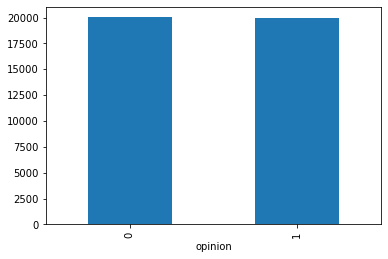

In [15]:
imdb_df.groupby("opinion").size().plot(kind = 'bar')

In [16]:
imdb_df.head(5)

,movie_review,opinion,movie_review_cleanText
0,I grew up (b. 1965) watching and loving the Th...,0,grew b watching loving thunderbird mate school...
1,"When I put this movie in my DVD player, and sa...",0,put movie dvd player sat coke chip expectation...
2,Why do people who do not know what a particula...,0,people not know particular time past like feel...
3,Even though I have great interest in Biblical ...,0,even though great interest biblical movie bore...
4,Im a die hard Dads Army fan and nothing will e...,1,im die hard dad army fan nothing ever change g...


In [ ]:
imdb_df.to_csv("./output.csv")

In [17]:
imdb_df['word_count_before'] = imdb_df['movie_review'].apply(lambda x: len(str(x).split(" ")))
imdb_df.head(10)

,movie_review,opinion,movie_review_cleanText,word_count_before
0,I grew up (b. 1965) watching and loving the Th...,0,grew b watching loving thunderbird mate school...,151
1,"When I put this movie in my DVD player, and sa...",0,put movie dvd player sat coke chip expectation...,326
2,Why do people who do not know what a particula...,0,people not know particular time past like feel...,184
3,Even though I have great interest in Biblical ...,0,even though great interest biblical movie bore...,69
4,Im a die hard Dads Army fan and nothing will e...,1,im die hard dad army fan nothing ever change g...,178
5,A terrible movie as everyone has said. What ma...,0,terrible movie everyone said made laugh cameo ...,102
6,Finally watched this shocking movie last night...,1,finally watched shocking movie last night dist...,239
7,I caught this film on AZN on cable. It sounded...,0,caught film azn cable sounded like would good ...,271
8,It may be the remake of 1987 Autumn's Tale aft...,1,may remake autumn tale eleven year director ma...,188
9,My Super Ex Girlfriend turned out to be a plea...,1,super ex girlfriend turned pleasant surprise r...,282


In [18]:
imdb_df['word_count_after'] = imdb_df['movie_review_cleanText'].apply(lambda x: len(str(x).split(" ")))
imdb_df.head(10)

,movie_review,opinion,movie_review_cleanText,word_count_before,word_count_after
0,I grew up (b. 1965) watching and loving the Th...,0,grew b watching loving thunderbird mate school...,151,86
1,"When I put this movie in my DVD player, and sa...",0,put movie dvd player sat coke chip expectation...,326,167
2,Why do people who do not know what a particula...,0,people not know particular time past like feel...,184,97
3,Even though I have great interest in Biblical ...,0,even though great interest biblical movie bore...,69,34
4,Im a die hard Dads Army fan and nothing will e...,1,im die hard dad army fan nothing ever change g...,178,103
5,A terrible movie as everyone has said. What ma...,0,terrible movie everyone said made laugh cameo ...,102,55
6,Finally watched this shocking movie last night...,1,finally watched shocking movie last night dist...,239,123
7,I caught this film on AZN on cable. It sounded...,0,caught film azn cable sounded like would good ...,271,145
8,It may be the remake of 1987 Autumn's Tale aft...,1,may remake autumn tale eleven year director ma...,188,111
9,My Super Ex Girlfriend turned out to be a plea...,1,super ex girlfriend turned pleasant surprise r...,282,138


In [19]:
imdb_df.columns

Index(['movie_review', 'opinion', 'movie_review_cleanText',
       'word_count_before', 'word_count_after'],
      dtype='object')

In [20]:
imdb_df.word_count_before.describe()

count    40000.000000
mean       231.328975
std        171.178333
min          4.000000
25%        126.000000
50%        173.000000
75%        282.000000
max       2470.000000
Name: word_count_before, dtype: float64

In [21]:
imdb_df.word_count_after.describe()

count    40000.000000
mean       120.895050
std         90.928812
min          3.000000
25%         65.000000
50%         90.000000
75%        147.000000
max       1428.000000
Name: word_count_after, dtype: float64

# After prepocessing we can see that avg of each sentence around 120 words but before preprocessing it is around 230

In [23]:
imdb_df.describe()

,opinion,word_count_before,word_count_after
count,40000.000000,40000.000000,40000.000000
mean,0.499525,231.328975,120.895050
std,0.500006,171.178333,90.928812
min,0.000000,4.000000,3.000000
25%,0.000000,126.000000,65.000000
50%,0.000000,173.000000,90.000000
75%,1.000000,282.000000,147.000000
max,1.000000,2470.000000,1428.000000


In [26]:
imdb_df[imdb_df.word_count_before < 5] # trying to remove the sentences that contain less than 5 words

,movie_review,opinion,movie_review_cleanText,word_count_before,word_count_after
36009,Primary plot!Primary direction!Poor interpreta...,0,primary plot primary direction poor interpreta...,4,6


In [27]:
# import pandas as pd
# from sklearn import datasets, linear_model
# from sklearn.model_selection import train_test_split
# from matplotlib import pyplot as plt

In [29]:
training, testing = train_test_split(imdb_df, test_size=0.33)

In [30]:
imdb_df.columns

Index(['movie_review', 'opinion', 'movie_review_cleanText',
       'word_count_before', 'word_count_after'],
      dtype='object')

In [34]:
X_train=training["movie_review_cleanText"]
Y_train=training["opinion"]
training_dataset_df = pd.DataFrame({'movie_review_cleanText':X_train,'opinion': Y_train})

In [35]:
training_dataset_df.head(2)

,movie_review_cleanText,opinion
33826,heidijean really see movie great christmas mov...,0
23063,plot eventy ive involves college kid play crue...,0


In [36]:
training_case_list=[]
for row in training_dataset_df["movie_review_cleanText"]:
    training_case_list.append(row)

In [37]:
## Convert the text form data into vector form using bag of words and tfidf
def vectorization_bow_tfidf(training_case_list, bow = None, tfidf = None):
    if tfidf == True:        
        vectorizer_i1 = TfidfVectorizer()
        tfidf_matrix_iteartion1 = vectorizer_i1.fit_transform(training_case_list)
    if bow == True:
        vectorizer_i1 = CountVectorizer(analyzer='word',ngram_range=(1,3), encoding="ISO-8859-1")
        tfidf_matrix_iteartion1 = vectorizer_i1.fit_transform(training_case_list) ## Transform strings to tf-idf matrix

    X_train=tfidf_matrix_iteartion1
    y_train=training_dataset["opinion"].values
    
    return X_train, y_train, vectorizer_i1

In [42]:
# For the clean text got the tfidf vector form 
X_train, y_train, vectorizer_i2 = vectorization_bow_tfidf(training_dataset["movie_review_cleanText"].tolist(),\
                                                          False, True)

# Training the model with the manually tagged notes

# Linear SVC

In [43]:
clf_svc=LinearSVC()
clf_fit_svc=clf_svc.fit(X_train,y_train)

# Naive Bayes

In [44]:
clf_nb=(MultinomialNB(fit_prior=True, class_prior=None))
clf_fit_nb=clf_nb.fit(X_train,y_train)

# Logistic Regression

In [45]:
clf_lr=OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)
clf_fit_lr=clf_lr.fit(X_train,y_train)

# Random Forest

In [54]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':list(range(25,50))}
clf_rf = RandomForestClassifier()

In [55]:
gridcv = GridSearchCV(clf_rf, params,n_jobs=-1)
# gridcv.fit(X_train, y_train)x
# gridcv.best_params_

In [60]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100) 
clf_fit_rf = clf_rf.fit(X_train,y_train)

# Test the models

In [61]:
testing_data_list = []
for i in testing["movie_review_cleanText"]:
    testing_data_list.append(i)

In [62]:
X_test_overall = vectorizer_i2.transform(testing_data_list)
y_test_overall=testing['opinion'].values

In [63]:
def classify_cases(X_test,model_fit):
    clf_predict=model_fit.predict(X_test)
    return clf_predict

In [64]:
## Function to predict case reason for test data of SVC
clf_predict_svc=classify_cases(X_test_overall,clf_fit_svc)

In [65]:
## Function to predict case reason for test data of logistic regression
clf_predict_lr=classify_cases(X_test_overall,clf_fit_lr)

In [66]:
## Function to predict case reason for test data of naive bayes
clf_predict_nb=classify_cases(X_test_overall,clf_fit_nb)

In [67]:
## Function to predict case reason for test data of Random Forest
clf_predict_rf=classify_cases(X_test_overall,clf_fit_rf)

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [69]:
def generate_accuracy_report(y_test,clf_predict,dataset):
    print ("Overall Classifier's Accuracy: ", accuracy_score(y_test,clf_predict))
    
    print ("############### Confusion Matrix ###############")
    x=confusion_matrix(y_test, clf_predict)
    confusion_mat=pd.DataFrame(x)
    print (confusion_mat)

    print ("############### Classification Report ###############")
    print(classification_report(y_test, clf_predict))
    
    dataset["actual"]=y_test
    dataset["predicted"]=clf_predict

In [70]:
generate_accuracy_report(y_test_overall,clf_predict_svc,testing)

Overall Classifier's Accuracy:  0.8903787878787879
############### Confusion Matrix ###############
      0     1
0  5754   787
1   660  5999
############### Classification Report ###############
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      6541
           1       0.88      0.90      0.89      6659

    accuracy                           0.89     13200
   macro avg       0.89      0.89      0.89     13200
weighted avg       0.89      0.89      0.89     13200



In [71]:
print('Test accuracy is {}'.format(accuracy_score(y_test_overall,clf_predict_svc)))

Test accuracy is 0.8903787878787879


In [72]:
testing['opinion_svc'] = clf_predict_svc
testing.head(1)

,movie_review,opinion,movie_review_cleanText,word_count_before,word_count_after,actual,predicted,opinion_svc
14852,What else is left to say?<br /><br />I've read...,0,else left say read review right however one pe...,144,69,0,0,0


# Test for Logistic regression model

In [73]:
generate_accuracy_report(y_test_overall,clf_predict_lr,testing)

Overall Classifier's Accuracy:  0.8928030303030303
############### Confusion Matrix ###############
      0     1
0  5741   800
1   615  6044
############### Classification Report ###############
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      6541
           1       0.88      0.91      0.90      6659

    accuracy                           0.89     13200
   macro avg       0.89      0.89      0.89     13200
weighted avg       0.89      0.89      0.89     13200



In [74]:
print('Test accuracy is {}'.format(accuracy_score(y_test_overall,clf_predict_lr)))

Test accuracy is 0.8928030303030303


In [75]:
testing['opinion_LR'] = clf_predict_lr
testing.head(1)

,movie_review,opinion,movie_review_cleanText,word_count_before,word_count_after,actual,predicted,opinion_svc,opinion_LR
14852,What else is left to say?<br /><br />I've read...,0,else left say read review right however one pe...,144,69,0,0,0,0


# Test for Naive Bayes models

In [76]:
generate_accuracy_report(y_test_overall,clf_predict_nb,testing)

Overall Classifier's Accuracy:  0.8600757575757576
############### Confusion Matrix ###############
      0     1
0  5769   772
1  1075  5584
############### Classification Report ###############
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      6541
           1       0.88      0.84      0.86      6659

    accuracy                           0.86     13200
   macro avg       0.86      0.86      0.86     13200
weighted avg       0.86      0.86      0.86     13200



In [77]:
testing['opinion_NB'] = clf_predict_nb
testing.head(1)

,movie_review,opinion,movie_review_cleanText,word_count_before,word_count_after,actual,predicted,opinion_svc,opinion_LR,opinion_NB
14852,What else is left to say?<br /><br />I've read...,0,else left say read review right however one pe...,144,69,0,0,0,0,0


In [78]:
testing.tail(1)

,movie_review,opinion,movie_review_cleanText,word_count_before,word_count_after,actual,predicted,opinion_svc,opinion_LR,opinion_NB
20545,"On the bright side, it ended. That's the only ...",0,bright side ended thing movie going course wor...,75,34,0,0,0,0,0


# Test on Random forest model

In [79]:
# performing predictions on the test dataset
clf_predict_rf = clf_rf.predict(X_test_overall)

In [81]:
from sklearn import metrics 

In [82]:
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test_overall, clf_predict_rf))

ACCURACY OF THE MODEL:  0.8384090909090909


In [83]:
generate_accuracy_report(y_test_overall,clf_predict_rf,testing)

Overall Classifier's Accuracy:  0.8384090909090909
############### Confusion Matrix ###############
      0     1
0  5439  1102
1  1031  5628
############### Classification Report ###############
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      6541
           1       0.84      0.85      0.84      6659

    accuracy                           0.84     13200
   macro avg       0.84      0.84      0.84     13200
weighted avg       0.84      0.84      0.84     13200



In [84]:
testing['opinion_RF'] = clf_predict_rf
testing.head(1)

,movie_review,opinion,movie_review_cleanText,word_count_before,word_count_after,actual,predicted,opinion_svc,opinion_LR,opinion_NB,opinion_RF
14852,What else is left to say?<br /><br />I've read...,0,else left say read review right however one pe...,144,69,0,0,0,0,0,0


In [88]:
testing.sample(5)

,movie_review,opinion,movie_review_cleanText,word_count_before,word_count_after,actual,predicted,opinion_svc,opinion_LR,opinion_NB,opinion_RF
21337,This is a very famous Ninja movie but it isn't...,0,famous ninja movie not nice movie want see nin...,211,107,0,0,1,1,0,0
8186,Let me start by saying that if you're expectin...,1,let start saying expecting subtle humour wrong...,488,233,1,0,1,1,0,0
9935,"Aussie Shakespeare for 18-24 set.with blood ,b...",0,aussie shakespeare set blood blood blood good ...,150,70,0,1,1,1,0,1
37375,Arthur Miller certainly knows. His stories giv...,1,arthur miller certainly know story give cleare...,63,35,1,1,1,1,1,1
20716,"If this movie would have been in English, all ...",0,movie would english critic would trashed langu...,331,157,0,0,0,0,0,0


In [89]:
imdb_df.shape

(40000, 5)

# Result Summary

# Finding

# From the models logistic regression and SVC model are performed very well with a accuracy of almost 90 percentage

In [90]:
'''Intial expectaion I though of trying to do this project using the bag of words(BOW) but after comparing the result with
tfidf the accurary seems to be prety good with tfidf. So, I continued with tdidf'''

'Intial expectaion I though of trying to this project using the bag of words(BOW) but after comparing the result with\ntfidf the accurary seems to be prety good. So, I continued with tdidf'

# Future

In [ ]:
'''If there any time i thought of implementing for neural sentences also'''